In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [64]:
file = open('results.3d_theory/ecc_sup_N=100_N01xN01xN01_representation.pickle', 'rb')
dat = pickle.load(file)

In [3]:
alpha = 0.05
dat_sig = np.load('results.3d_theory/ecc_sup_N=100_N01xN01xN01_signature_distance_matrix.npy')
q = np.quantile(dat_sig, 1-alpha)
#plt.hist(dat_sig)

In [20]:
def get_q(dist_label, N, alpha=0.05):
    filename = f'results.3d_theory/ecc_sup_N={N}_{dist_label}_signature_distance_matrix.npy'
    #print(filename)
    dat = np.load(filename)
    q = np.quantile(dat, 1-alpha)
    return q

In [21]:
Ns = [100, 300, 500, 1000, 2000, 3000, 5000, 7500, 10000, 12500, 15000, 20000, 25000, 30000]
labels = ['N01xN01xN01', 'T3xT3xT3', 'UxUxU', 'B22xB22xB22']
qs = {}
for label in labels:
    qs[label] = []
    for N in Ns:
        q=get_q(label, N=N)
        #q=q/N**(1/3)
        qs[label].append([N, q])

Text(0, 0.5, 'threshold')

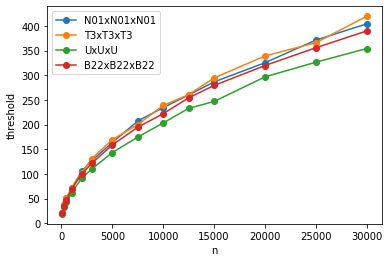

In [22]:
for label in qs.keys():
    val = np.array(qs[label])
    plt.plot(val[:, 0], val[:, 1], 'o-', label=label)
plt.legend()
plt.xlabel('n')
plt.ylabel('threshold')

In [23]:
from collections import defaultdict

Text(0.5, 1.0, 'True: N01xN01xN01')

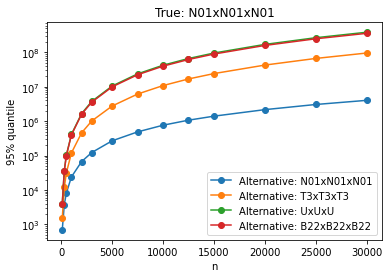

In [24]:
res = defaultdict(list)
true_distrib='N01xN01xN01'
Ns = [100, 300, 500, 1000, 2000, 3000, 5000, 7500, 10000, 12500, 15000, 20000, 25000, 30000]
for N in Ns:
    file = open(f'results.3d_theory/ecc_sup_N={N}_{true_distrib}_representation.pickle', 'rb')
    dat = pickle.load(file)
    ecc_mean = np.mean(dat[7][true_distrib], axis=0)
    for key in dat[7].keys():
        q = np.quantile(np.max(np.abs(np.array(dat[7][key])-ecc_mean),axis=1), q=0.95)
        res[key].append([N, q*N**1/3])

for key in res:
    x = np.array(res[key])
    plt.plot(x[:, 0], x[:, 1], 'o-', label=f'Alternative: {key}')
plt.legend()
plt.xlabel('n')
plt.ylabel('95% quantile')
plt.yscale('log')
plt.title(f'True: {true_distrib}')

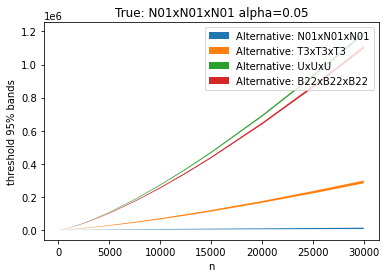

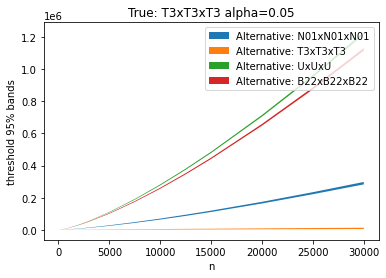

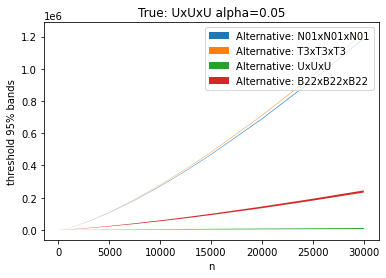

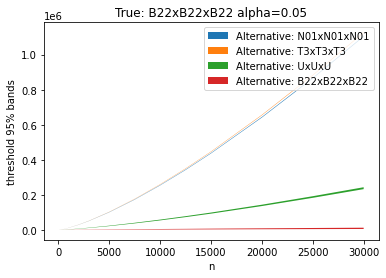

<Figure size 432x288 with 0 Axes>

In [25]:
true_distribs=['N01xN01xN01', 'T3xT3xT3', 'UxUxU', 'B22xB22xB22']
Ns = [100, 300, 500, 1000, 2000, 3000, 5000, 7500, 10000, 12500, 15000, 20000, 25000, 30000]
#Ns = [100, 300, 500, 1000]
alpha=0.05
for true_distrib in true_distribs:
    res = defaultdict(list)
    for N in Ns:
        file = open(f'results.3d_theory/ecc_sup_N={N}_{true_distrib}_representation.pickle', 'rb')
        dat = pickle.load(file)
        ecc_mean = np.mean(dat[7][true_distrib], axis=0)
        for key in dat[7].keys():
            q_low = np.quantile(np.max(np.abs(np.array(dat[7][key])-ecc_mean),axis=1), q=alpha/2)*N**(1/3)
            q_up = np.quantile(np.max(np.abs(np.array(dat[7][key])-ecc_mean),axis=1), q=1-alpha/2)*N**(1/3)
            res[key].append([N, q_low, q_up])
    for key_id, key in enumerate(res):
        x = np.array(res[key])
        #plt.plot(x[:, 0], x[:, 1], 'o-', label=f'Alternative: {key}', color=colors[key_id])
        #plt.plot(x[:, 0], x[:, 2], 'o-', color=colors[key_id])
        plt.fill_between(x[:, 0], x[:, 1], x[:, 2], label=f'Alternative: {key}')
    plt.legend()
    plt.xlabel('n')
    plt.ylabel('threshold 95% bands')
    plt.title(f'True: {true_distrib} alpha={alpha}')
    plt.show()
    plt.clf()

In [147]:
N=20000
true_distrib='N01xN01xN01'
file = open(f'results.3d_theory/ecc_sup_N={N}_{true_distrib}_representation.pickle', 'rb')
dat = pickle.load(file)

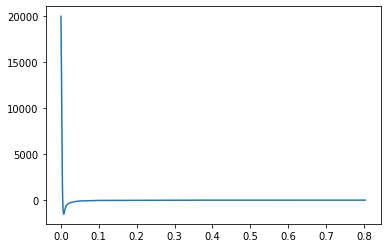

In [148]:
plt.plot(dat[0], dat[1])

In [248]:
xs = dat[6]
y = np.array(dat[7]['N01xN01xN01'])
y = y/N**(1/3)
fs = (y - np.mean(y, axis=0))/np.sqrt(N)

In [251]:
sigma2 = np.max(np.mean(fs**2, axis=0))

0.0007969409460352131

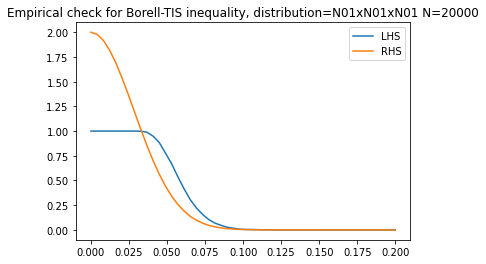

In [177]:
# implementing Niklas equation
ts = np.linspace(0., 0.2)
lhs = []
rhs = []
for t in ts:
    lhs.append( np.sum(f_T > t)/fs_abs.shape[0] )
    rhs.append(2*np.exp(-t**2/(2*sigma2)))
    
plt.plot(ts, lhs, label='LHS')
plt.plot(ts, rhs, label='RHS')
plt.title(f'Empirical check for Borell-TIS inequality, distribution={true_distrib} N={N}')
plt.legend()

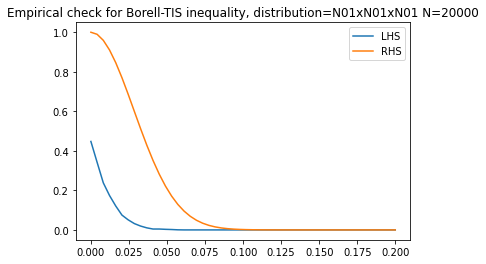

In [175]:
ts = np.linspace(0., 0.2)
lhs = []
rhs = []
# wiki eqn P(||f||_T > E(||f||_T) +u )
# the same as (2.1.5) in AT07
for t in ts:
    lhs.append( np.sum(f_T > Ef_T+t)/fs_abs.shape[0] )
    rhs.append(np.exp(-t**2/(2*sigma2)))
    
plt.plot(ts, lhs, label='LHS')
plt.plot(ts, rhs, label='RHS')
plt.title(f'Empirical check for Borell-TIS inequality, distribution={true_distrib} N={N}')
plt.legend()

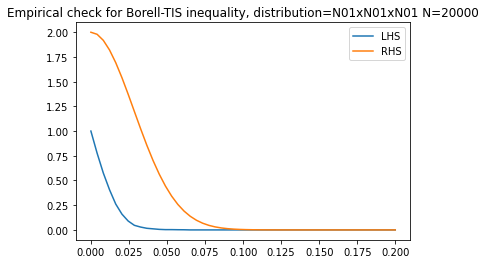

In [176]:
ts = np.linspace(0.0, 0.2)
lhs = []
rhs = []
for t in ts:
    lhs.append( np.sum(np.abs(np.max(fs, axis=1) - np.mean(np.max(fs, axis=1))) > t)/fs.shape[0] )
    rhs.append(2*np.exp(-t**2/(2*sigma2)))
    #print(f'lhs={lhs} rhs={rhs}')
    
plt.plot(ts, lhs, label='LHS')
plt.plot(ts, rhs, label='RHS')
plt.title(f'Empirical check for Borell-TIS inequality, distribution={true_distrib} N={N}')
plt.legend()

In [188]:
gamma = np.mean(np.max(fs, axis=1))

In [193]:
gamma

0.05147709031420581

In [205]:
np.quantile(np.max(fs, axis=1), q=0.95)*np.sqrt(N)

13.60848469487237

In [204]:
np.sqrt(-2*sigma2*np.log(0.05/2)*N)

13.28115751424872

In [206]:
np.sqrt(-2*sigma2*np.log(0.05/2)*N)+gamma

13.332634604562926

(0.0, 1.0)

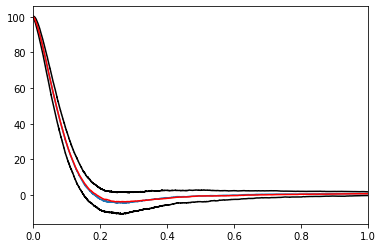

In [96]:
plt.plot(dat[0], dat[1])
plt.plot(dat[0], dat[1]+dat[3], color='black')
plt.plot(dat[0], dat[1]-dat[3], color='black')
plt.plot(x,y,color='red')
plt.xlim((0, 1))

In [43]:
dat[7].keys()

dict_keys(['N01xN01xN01', 'T3xT3xT3', 'UxUxU', 'B22xB22xB22'])

Text(0.5, 1.0, 'n=1000, dim=3')

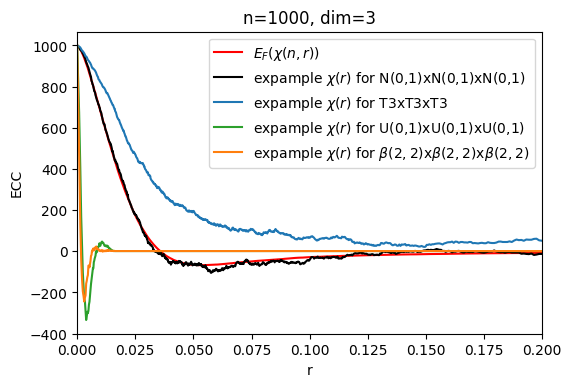

In [52]:
N=1000
true_distrib='N01xN01xN01'
file = open(f'results.3d_theory/ecc_sup_N={N}_{true_distrib}_representation.pickle', 'rb')
dat = pickle.load(file)
figure(figsize=(6, 4), dpi=100)
plt.plot(dat[0], dat[1], color='red', label=r'$E_F(\chi(n,r))$')
plt.plot(dat[6], dat[7]['N01xN01xN01'][0], color='black', label=r'expample $\chi(r)$ for N(0,1)xN(0,1)xN(0,1)')
plt.plot(dat[6], dat[7]['T3xT3xT3'][0], color='tab:blue', label=r'expample $\chi(r)$ for T3xT3xT3')
plt.plot(dat[6], dat[7]['UxUxU'][0], color='tab:green', label=r'expample $\chi(r)$ for U(0,1)xU(0,1)xU(0,1)')
plt.plot(dat[6], dat[7]['B22xB22xB22'][0], color='tab:orange', label=r'expample $\chi(r)$ for $\beta(2,2)$x$\beta(2,2)$x$\beta(2,2)$')

plt.xlim((0, .2))
plt.legend()
plt.xlabel('r')
plt.ylabel('ECC')
plt.title(f'n={N}, dim=3')

In [ ]:
# H0 false

In [53]:
res = []
for N in Ns:
    true_distrib='N01xN01xN01'
    file = open(f'results.3d_theory/ecc_sup_N={N}_{true_distrib}_representation.pickle', 'rb')
    dat = pickle.load(file)
    EP_chi = np.mean(dat[7][true_distrib], axis=0)
    d = np.mean(np.max(np.abs(dat[7]['T3xT3xT3'] - EP_chi), axis=1))
    res.append([N, d])
res = np.array(res)

Text(0.5, 1.0, 'F = N(0,1)xN(0,1)xN(0,1)')

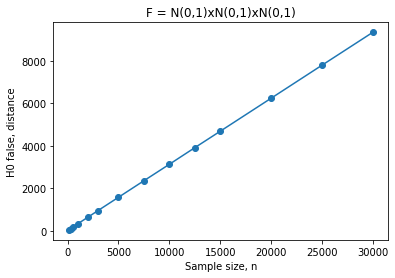

In [55]:
# linear relation as predicted by Niklas
plt.plot(res[:, 0], res[:, 1], 'o-')
plt.xlabel('Sample size, n')
plt.ylabel('H0 false, distance')
plt.title('F = N(0,1)xN(0,1)xN(0,1)')

In [2]:
def Pr(x):
    return sum(x)/len(x)

In [30]:
N=1000
true_distrib='N01xN01xN01'
file = open(f'results.3d_theory/ecc_sup_N={N}_{true_distrib}_representation.pickle', 'rb')
dat = pickle.load(file)

dat_P = np.array(dat[7][true_distrib])/N**(1/3.0)
dat_Q = np.array(dat[7]['T3xT3xT3'])/N**(1/3.0)

EP_chi = np.mean(dat_P, axis=0)
EQ_chi = np.mean(dat_Q, axis=0)
gr = EQ_chi - EP_chi

Gr = (dat_Q - EQ_chi)/np.sqrt(N)
gr_norm = gr/np.sqrt(N)
gr_norm_sup = np.max(np.abs(gr_norm))
gr_sup = np.max(np.abs(gr))
#d = np.max(np.abs(dat_Q - EP_chi), axis=1)

In [4]:
def f(X):
    return np.max(np.abs(X), axis=1) - np.mean(np.max(np.abs(X), axis=1))

In [11]:
q = 1
Gr < (q - gr_sup)/np.sqrt(N)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

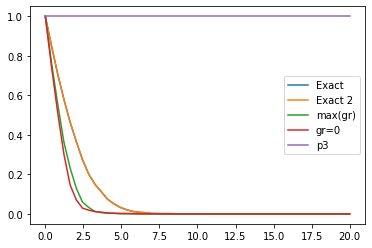

In [22]:
qs = np.linspace(0, 20)
p_exacts = []
p0s = []
p1s = []
p2s = []
p3s = []
for q in qs:
    #p_exact = Pr(np.abs(np.max(np.abs(dat_Q - EP_chi), axis=1) - np.mean(np.max(np.abs(dat_Q - EP_chi), axis=1)))>q)
    p_exact = Pr(np.abs(f(dat_Q - EP_chi)) > q)
    #p0 = Pr(np.abs(np.max(dat_Q - EQ_chi + gr, axis=1) - np.mean(np.max(dat_Q - EQ_chi + gr, axis=1))) > q)
    #p0 = Pr(np.abs(np.max(np.abs(Gr + gr_norm), axis=1) - np.mean(np.max(np.abs(Gr + gr_norm), axis=1))) > q/np.sqrt(N))
    p0 = Pr(np.abs(f(Gr + gr_norm)) > q/np.sqrt(N))
    p1 = Pr(np.abs(f(Gr + gr_norm_sup)) > q/np.sqrt(N))
    p2 = Pr(np.abs(f(Gr)) > q/np.sqrt(N))
    p3 = Pr(np.abs(f(Gr)) + 2*gr_norm_sup > q/np.sqrt(N))
        
    p_exacts.append(p_exact)
    p0s.append(p0)
    p1s.append(p1)
    p2s.append(p2)
    p3s.append(p3)

plt.plot(qs, p_exacts, label='Exact')
plt.plot(qs, p0s, label='Exact 2')
plt.plot(qs, p1s, label='max(gr)')
plt.plot(qs, p2s, label='gr=0')
plt.plot(qs, p3s, label='p3')
plt.legend()

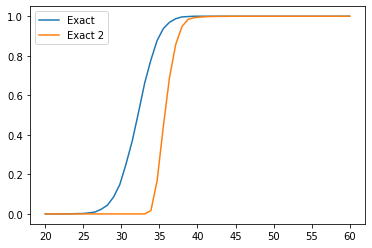

In [57]:
qs = np.linspace(20, 60)
p_exacts = []
p0s = []
p1s = []
for q in qs:
    p_exact = Pr(np.max(np.abs(dat_Q - EP_chi), axis=1) < q)
    p0 = Pr(np.max(np.abs(dat_Q - EQ_chi), axis=1) + gr_sup < q)
    p2 = Pr(np.max(np.abs(dat_Q - EQ_chi), axis=1) + gr_sup < q)
    
    p_exacts.append(p_exact)
    p0s.append(p0)
    p1s.append(p1)

plt.plot(qs, p_exacts, label='Exact')
plt.plot(qs, p0s, label='Exact 2')
plt.plot(qs, p1s, label='Exact 2')
plt.legend()

In [54]:
Pr(np.max(np.abs(dat_Q - EQ_chi), axis=1) + gr_sup > 35)

0.74

In [55]:
Pr(np.max(np.abs(dat_Q - EP_chi), axis=1) > 35)

0.0955

In [56]:
Pr(np.max(np.abs(dat_Q - EQ_chi), axis=1) + gr_sup >= np.max(np.abs(dat_Q - EP_chi), axis=1))

1.0

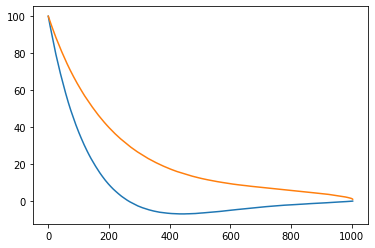

In [9]:
plt.plot(EP_chi)
plt.plot(EQ_chi)

In [269]:
t = 2
Pr(np.abs(d-np.mean(d)) > t)

0.6115

In [270]:
gr = np.mean(dat_Q, axis=0) - np.mean(dat_P, axis=0)
supgr = np.max(np.abs(gr))
fs = (dat_P - np.mean(dat_P, axis=0))/np.sqrt(N)
sigma2 = np.max(np.mean(fs**2, axis=0))

In [272]:
supgr

228.60421189662685